In [7]:
import numpy as np ; import pandas as pd; import seaborn as sns;import matplotlib.pyplot as plt; 
from sklearn.linear_model import LinearRegression; from sklearn.model_selection import train_test_split; from sklearn import metrics
%matplotlib inline

# Ecommerce Optimization Project - Linear Regression

**Project Details**

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

**Research Question**

Should they focus their efforts on their mobile app experience or their website to drive more orders?

## Dataset
**Non-numeric Data**
* Email
* Address
* Color Avatar

**Numeric Data**
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 
* Yearly Amount Spent

In [2]:
customers = pd.read_csv("Ecommerce Customers")
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
# Analysis is based on 500 customer data
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

The purpose of this section is to find the most corrected feature(s) to apply linear regression. The best tool we can use to do this accross the entire dataset is the pairplot

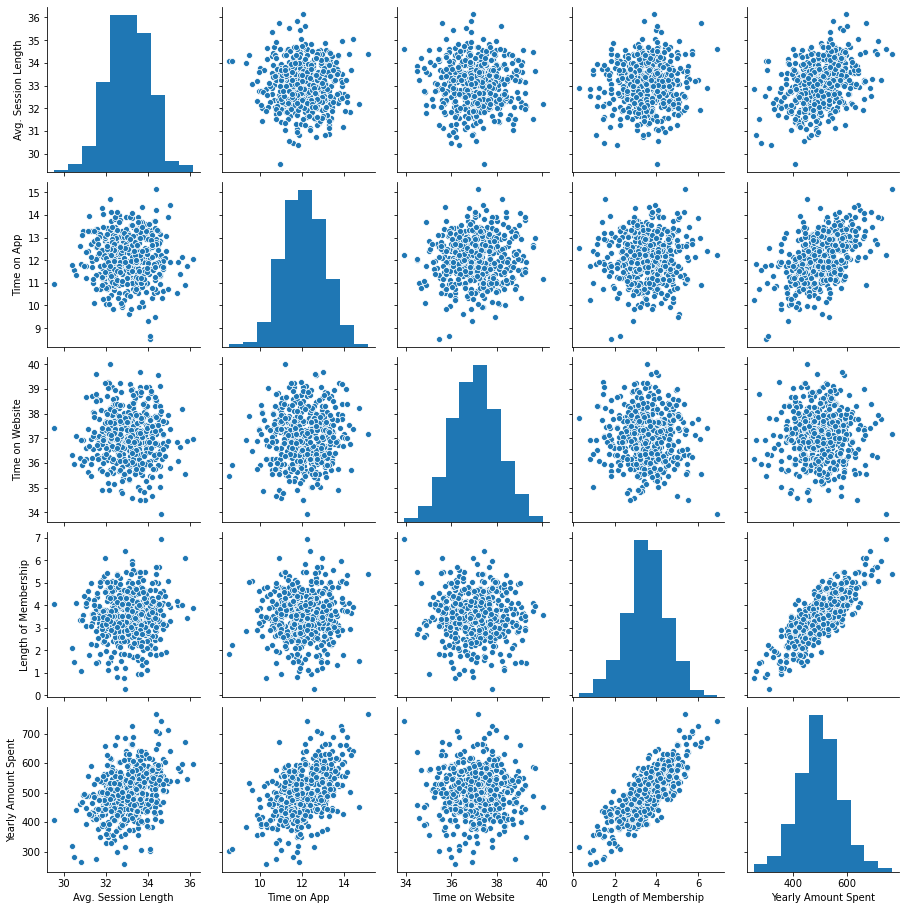

In [14]:
sns.pairplot(customers)

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent is 
**Length of Membership**

# Training and Testing Data

## Data Preperation

In [3]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [4]:
# Set a variable X equal to the numerical features of the customer
# Set a variable y equal to the Yearly Amount Spent
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Create an instance of a LinearRegression() model

In [28]:
lm = LinearRegression()

Train/fit lm on the training data

In [29]:
lm.fit(X_train, y_train)

LinearRegression()

## Predicting Test Data

Use lm.predict() to predict off the X_test set of the data

In [34]:
predictions = lm.predict(X_test)

Create a scatterplot to compare real test values versus the predicted values

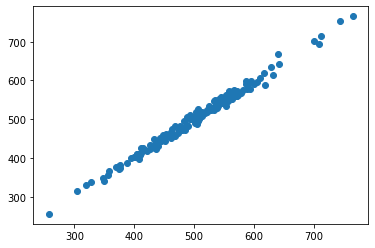

In [35]:
plt.scatter(y_test, predictions)

## Evaluating the Model

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

In [40]:
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

7.228148653430826
79.81305165097427
8.933815066978624


## Residuals

Create Histogram to make sure residuals look normally distributed

<AxesSubplot:xlabel='Yearly Amount Spent'>

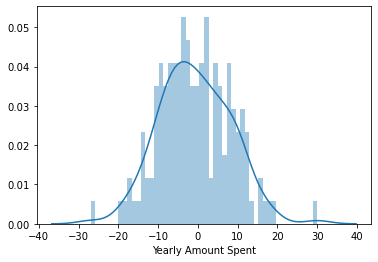

In [45]:
sns.distplot((y_test-predictions), bins = 50)

## Conclusion
To identify whether they should invest more in the website or application we'll need to look at the coefficients

In [47]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])
cdf

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


It seems like for every unit change in Time on App, there is a correponding 38.6 unit change in Yearly Amount Spend. And for every unit change in Time on Website, there is only a corresponding 0.19 unit change is Yearly Amount Spend. 

**In this case, the ROI of investing in the mobile app is significantly higher than that of the website, specifically they'll have a return of 38x on the mobile app compared to the website**